In [1]:
# Necessary because jupyter restricts relative imports from parent directories
import os
if os.getcwd().split('/')[-1] != 'tcav':
    print(os.getcwd())
    os.chdir('../')
    os.chdir('../')
    os.chdir('../')    
    print(os.getcwd())

/zhome/94/5/127021/speciale/tcav/tcav/tcav_examples/discrete
/zhome/94/5/127021/speciale/tcav


In [2]:
from tensorflow.io import gfile
from tcav.tcav_examples.discrete.kdd99_activation_generator import KDD99DiscreteActivationGenerator
from tcav.utils import create_session
from tcav.tcav_examples.discrete.kdd99_model_wrapper import KDD99KerasModelWrapper

import pickle

2022-09-13 13:52:51.031947: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-13 13:52:51.228041: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /lsf/10.1/linux3.10-glibc2.17-x86_64/lib
2022-09-13 13:52:51.228070: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-13 13:52:51.273185: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-1

In [3]:
# Make source directory, 
source_dir = "./tcav/tcav_examples/discrete/kdd_sanity2"
working_dir = source_dir
acts_dir = os.path.join(working_dir, "activations")
gfile.makedirs(acts_dir)
cav_dir = os.path.join(working_dir, "cav")
gfile.makedirs(cav_dir)


In [8]:
# Make data
! python ./tcav/tcav_examples/discrete/make_kdd99_concepts.py --source_dir={source_dir}


2022-09-13 09:15:49.529372: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-13 09:15:49.713130: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /lsf/10.1/linux3.10-glibc2.17-x86_64/lib
2022-09-13 09:15:49.713172: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-13 09:15:49.753943: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-1

In [4]:
# Create models
label_path = os.path.join(source_dir, "labels.txt")
model_path = os.path.join(source_dir, "kdd99_2.h5")
uci_model = KDD99KerasModelWrapper(create_session(), model_path, label_path)



Instructions for updating:
Colocations handled automatically by placer.


2022-09-13 13:32:28.474514: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-13 13:32:28.477318: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /lsf/10.1/linux3.10-glibc2.17-x86_64/lib
2022-09-13 13:32:28.477350: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-13 13:32:28.477376: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gbarlogin1): /proc/driver/nvidia/version does not exist
2022-09-13 13:32:28.884427: I tensorflow/compiler/mli

In [5]:
# Create activation generator
act_gen = KDD99DiscreteActivationGenerator(model=uci_model, source_dir=source_dir, acts_dir=acts_dir, max_examples=200)

In [6]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

target = "normal."
bottlenecks = ["dense", "dense_1" ]
concepts = ["dst_host_same_src_port_rate_less_than_one", "dst_host_same_src_port_rate_more_than_one"]
alphas = [0.01]
num_random = 20


my_tcav = TCAV(create_session,
                   target,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=num_random)


results = my_tcav.run()


with open('discrete_result_random_20.pickle', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)


INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_0'] normal. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_1'] normal. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_2'] normal. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_3'] normal. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_4'] normal. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_5'] normal. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_6'] normal. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_7'] normal. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_8'] normal. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_9'] normal. 0.01
INFO:tensorflow:dense ['dst_host_same_sr

In [3]:
open_pickle = True #False
if open_pickle:
    with open('discrete_result_random_30.pickle', 'rb') as handle:
        results = pickle.load(handle)

    with open('discrete_result_random_20.pickle', 'rb') as handle:
        results = pickle.load(handle)

Class = normal.
  Concept = dst_host_same_src_port_rate_less_than_one
>>> P-val <<<
 0.019
>>> Number of TCAV concept observations <<<
 20
>>> Number of TCAV random observations <<<
 380


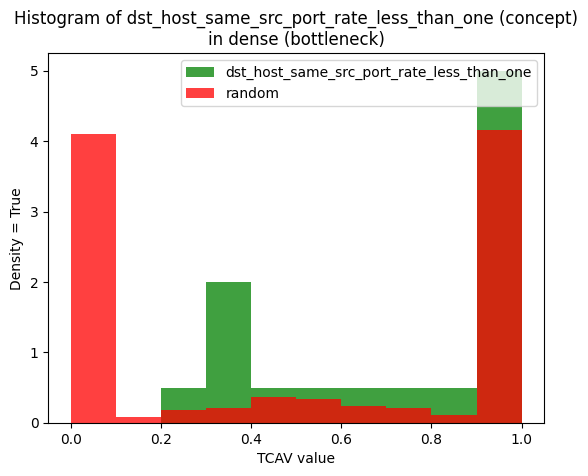

    Bottleneck = dense. TCAV Score = 0.75 (+- 0.28), random was 0.50 (+- 0.46). p-val = 0.019 (significant)
>>> P-val <<<
 0.001
>>> Number of TCAV concept observations <<<
 20
>>> Number of TCAV random observations <<<
 380


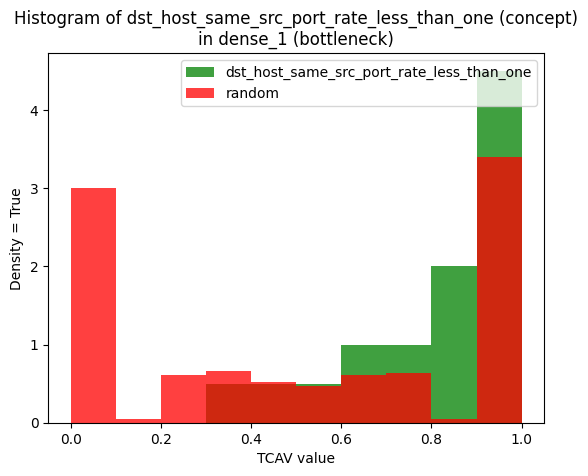

    Bottleneck = dense_1. TCAV Score = 0.83 (+- 0.19), random was 0.52 (+- 0.41). p-val = 0.001 (significant)
  Concept = dst_host_same_src_port_rate_more_than_one
>>> P-val <<<
 0.013
>>> Number of TCAV concept observations <<<
 20
>>> Number of TCAV random observations <<<
 380


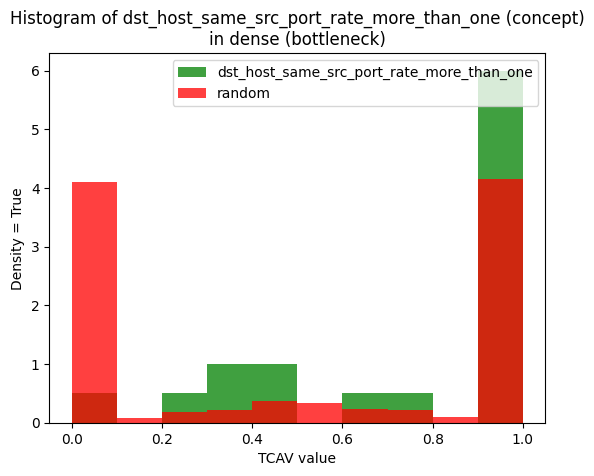

    Bottleneck = dense. TCAV Score = 0.76 (+- 0.32), random was 0.50 (+- 0.46). p-val = 0.013 (significant)
>>> P-val <<<
 0.012
>>> Number of TCAV concept observations <<<
 20
>>> Number of TCAV random observations <<<
 380


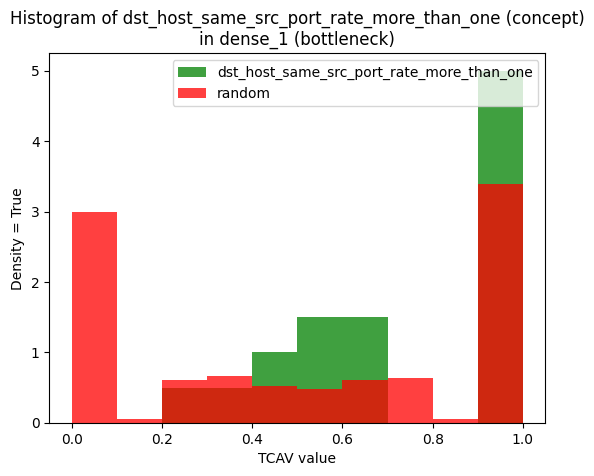

    Bottleneck = dense_1. TCAV Score = 0.75 (+- 0.25), random was 0.52 (+- 0.41). p-val = 0.012 (significant)
{'dense': {'bn_vals': [0.7470000000000001, 0.76175], 'bn_stds': [0.2807997507121401, 0.3188035249177775], 'significant': [True, True]}, 'dense_1': {'bn_vals': [0.827, 0.75225], 'bn_stds': [0.18805850153609113, 0.25369999507292074], 'significant': [True, True]}}


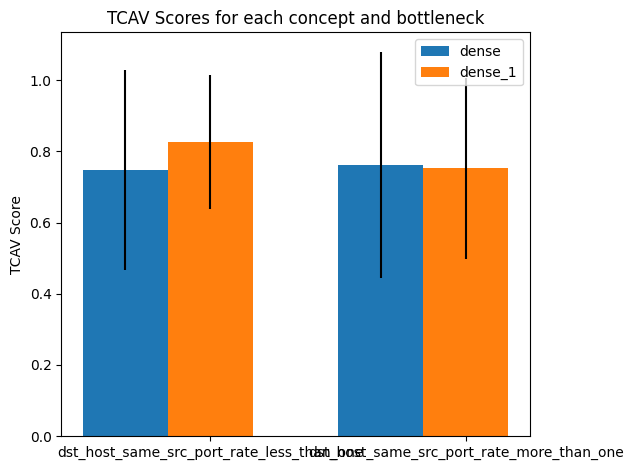

In [4]:
import tcav.utils_plot as utils_plot #
num_random = 20
utils_plot.plot_results(results, num_random_exp=num_random)



In [12]:
results[40]['i_up'] #'random500_0-random500_1
#  'random500_0-random500_1-dense-linear-0.01'

0.62

In [20]:
results[59]['i_up'] # 'random500_1-random500_0
# 'random500_1-random500_0-dense-linear-0.01'

0.455

In [22]:
results[41]['i_up'] # 'random500_0-random500_2-dense-linear-0.01'

0.0

In [26]:
results[78]['i_up'] # 'random500_2-random500_0-dense-linear-0.01',

1.0

In [28]:
results[42]['i_up'] # 'random500_0-random500_3-dense-linear-0.01'

0.995

In [30]:
results[97]['i_up'] # 'random500_3-random500_0-dense-linear-0.01',

0.0

In [32]:
results[43]['i_up'] # 'random500_0-random500_4-dense-linear-0.01'

0.385

In [34]:
results[116]['i_up'] # 'random500_4-random500_0-dense-linear-0.01'

0.03